## Creating Weather Animation Part 1 - Introduction to Tools and Techniques

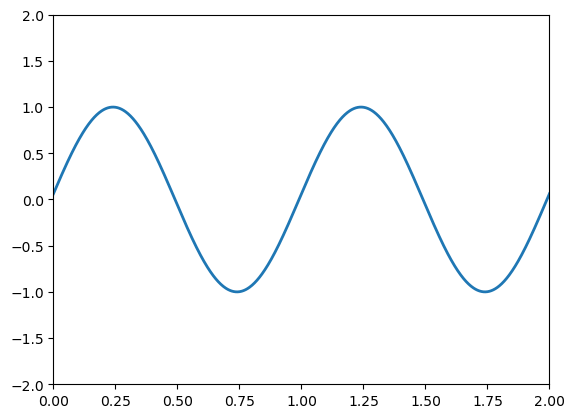

In [1]:
# Enable inline plotting for animations and interactive visualizations in Jupyter Notebooks.
%matplotlib inline

# Import essential libraries for numerical operations and plotting.
import numpy as np
import matplotlib.pyplot as plt

# Import the animation module from matplotlib to create dynamic visualizations and the HTML module to display animations in the notebook.
from matplotlib import animation
from IPython.display import HTML

# Create a figure and a single subplot with axes. This will be the canvas for our animation.
fig, ax = plt.subplots()

# Set the x and y axis limits of the plot. These limits provide the range of data to be displayed.
ax.set_xlim((0, 2))  # x-axis from 0 to 2
ax.set_ylim((-2, 2))  # y-axis from -2 to 2, useful for showing full amplitude of sine wave

# Initialize an empty line object with line width 2. This line will be updated in the animation.
line, = ax.plot([], [], lw=2)

# Define the initialization function for the animation. This function clears previous frames' data, setting the stage for new data.
def init():
    line.set_data([], [])  # Clear line data
    return (line,)

# Define the animation function which updates the content of the plot. This function will be called for each frame of the animation.
def animate(i):
    x = np.linspace(0, 2, 1000)  # Generate x values evenly spaced between 0 and 2
    y = np.sin(2 * np.pi * (x - 0.01 * i))  # Generate sine wave y values, creating a phase shift dependent on the frame
    line.set_data(x, y)  # Update the line's data for the new frame
    return (line,)

# Create an animation object. This object manages the dynamic redrawing of the line plot for each frame of the animation.
anim = animation.FuncAnimation(fig, animate, init_func=init,
                               frames=100, interval=20, blit=True)  # 100 frames, updating every 20 milliseconds, with blitting to improve performance.

# Display the animation in HTML format within the Jupyter Notebook to ensure it plays seamlessly.
HTML(anim.to_jshtml())

In [2]:
# Import necessary libraries for numerical computations and visualizations.
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.animation as animation
from IPython.display import HTML

# Create a matplotlib figure object. This figure will serve as the container for our animation.
fig = plt.figure()

# Define a function 'f' that takes x and y arrays as input and returns the sum of their sine and cosine.
# This function generates a dynamic pattern by combining two periodic functions, which we'll visualize.
def f(x, y):
    return np.sin(x) + np.cos(y)

# Generate arrays of x and y values that range from 0 to 2*pi.
# These arrays will be used as inputs to the function 'f' to create our visualization's grid.
x = np.linspace(0, 2 * np.pi, 120)  # 120 points along the x-axis
y = np.linspace(0, 2 * np.pi, 100).reshape(-1, 1)  # 100 points along the y-axis, reshaped to a column vector

# Initialize a list to store each frame of the animation.
# Each frame will be an image created by plotting the function 'f'.
ims = []

# Loop through 60 iterations to generate 60 frames for the animation.
# In each iteration, slightly shift x and y to create a moving effect in the resulting plot.
for i in range(60):
    x += np.pi / 15.  # Increment x slightly to shift the sine function horizontally.
    y += np.pi / 20.  # Increment y slightly to shift the cosine function vertically.
    # Calculate the function 'f' using the updated x and y, and create an image from the result.
    im = plt.imshow(f(x, y), animated=True)  # 'imshow' plots the 2D array returned by 'f'.
    ims.append([im])  # Add the resulting image to the list of frames.

# Close the plot to prevent it from showing statically in the output.
plt.close()

# Create an animation object using ArtistAnimation. This object will compile our list of images into a continuous animation.
# 'interval' sets the speed of the animation (50 ms between frames), and 'blit=True' optimizes the rendering.
ani = animation.ArtistAnimation(fig, ims, interval=50, blit=True, repeat_delay=1000)

# Display the animation within the Jupyter Notebook as an HTML5 video.
# This method allows the animation to be played interactively in the notebook.
HTML(ani.to_jshtml())